### **Exploratory Data Analysis**


### **Bitcoin V/s Altcoin**

**Importing Modules**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style = 'darkgrid')

**Importing data and Performing Cleanups**

In [2]:
df = pd.read_csv('D:\Crypto\Data\crypto_date.csv')
df.drop(columns='Unnamed: 0',inplace = True)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df.dropna()
df['year'] = df['year'].astype('Int64')

In [ ]:
df_btc = df[df['name'] == 'Bitcoin']
df_alt = df[df['name'] != 'Bitcoin']

**Plotting the data**

Text(0.5, 0.98, 'Price Distribution of Bitcoin')

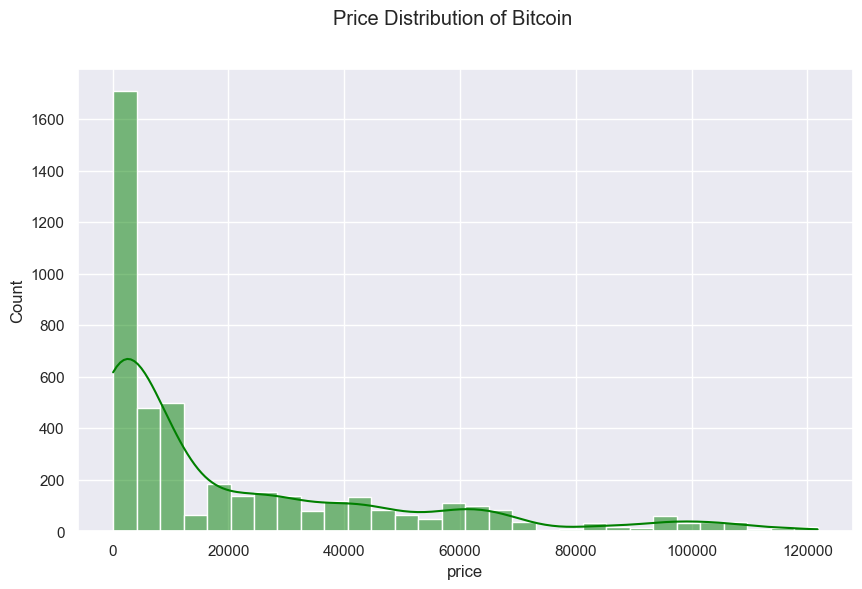

In [69]:
plt.figure(figsize = (10,6))
sns.histplot(data = df_btc['price'].dropna(),kde = True,bins = 30,color = 'green')
plt.suptitle('Price Distribution of Bitcoin')

This plot Show the price distribution of Bitcoin

In [5]:
alt_table1 = df_alt.groupby('name').agg(
    high_price=('price', 'max'),
    low_price=('price', 'min')
)


In [6]:
alt_table1['change'] = ((alt_table1['high_price'] - alt_table1['low_price'])/alt_table1['low_price'])*100

In [7]:
alt_table1['high_price'] = alt_table1['high_price'].astype('float')
alt_table1['low_price'] = alt_table1['low_price'].astype('float')

In [8]:
alt_table1['change'] = ((alt_table1['high_price'] - alt_table1['low_price'])/alt_table1['low_price'])*100

In [9]:
alt_table1['change']= alt_table1['change'].astype('int')

In [10]:
alt_table1 = alt_table1.sort_values(by = 'change')

In [68]:
t1 = alt_table1.tail(10)
t1

,high_price,low_price,change
name,,,
Cardano,2.965200,0.018539,15894
TRON,0.433490,0.001427,30281
Litecoin,386.451000,1.157010,33300
Chainlink,52.260000,0.131129,39753
Solana,261.820000,0.515273,50711
Stellar,0.896227,0.001357,65964
XRP,3.551500,0.002810,126278
Dogecoin,0.684777,0.000087,784607
Binance Coin,843.590000,0.099867,844615


In [19]:
changes_list = t1['change'].values
coins_list = t1.index

In [21]:
changes_list
coins_list
len(t1)

10

In [15]:
from matplotlib.ticker import FuncFormatter

Plotting the data

Text(0.5, 0.98, 'Price Change (%) of Top Cryptos Since Inception')

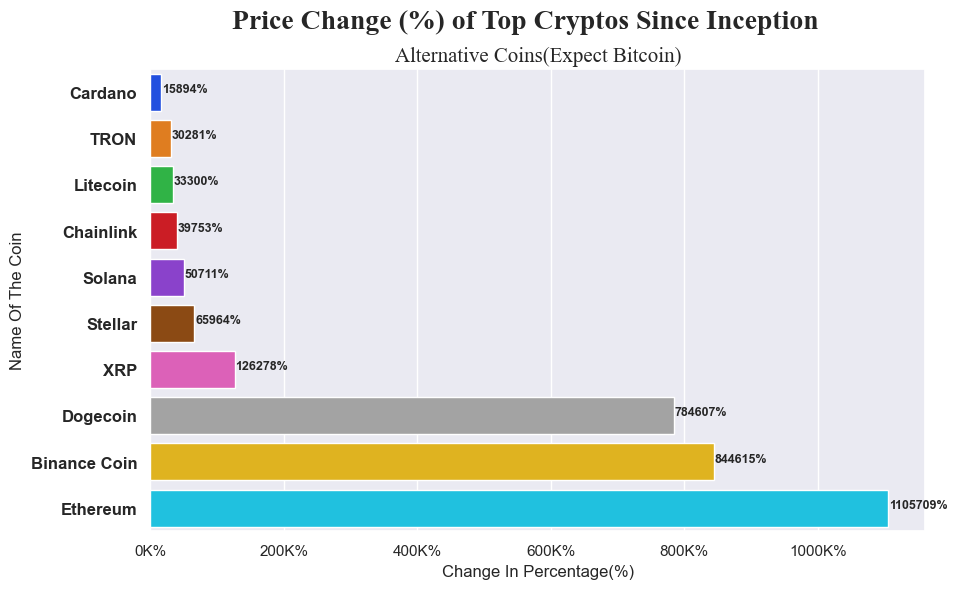

In [67]:
plt.figure(figsize = (10,6))
for i in range(len(t1)):
    plt.text(changes_list[i]+1000,i,f'{changes_list[i]}%',weight = 'bold',size = 9)
sns.barplot(data = t1,x = 'change',y = 'name',palette ='bright')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,_ : f'{int(int(x)/1000):}K%'))
plt.ylabel('Name Of The Coin')
plt.yticks(fontsize = 12,fontweight = 'bold')
plt.xlabel('Change In Percentage(%)')
plt.title('Alternative Coins(Expect Bitcoin)',fontfamily = 'Times New Roman',fontsize = 15)
plt.suptitle('Price Change (%) of Top Cryptos Since Inception',fontweight = 'bold',fontfamily = 'Times New Roman',fontsize = 20)